In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralnet import NeuralNetwork
from neuralnet import layers
from neuralnet.layers import activations

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

numpy version: 1.26.4
pandas version: 2.2.2


In [2]:
# input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

for input in range(4):
    print(f"input1: {X[input, 0]}")
    print(f"input2: {X[input, 1]}")
    print(f"output: {y[input]}")
    print("=====")


input1: 0
input2: 0
output: 0
=====
input1: 0
input2: 1
output: 1
=====
input1: 1
input2: 0
output: 1
=====
input1: 1
input2: 1
output: 0
=====


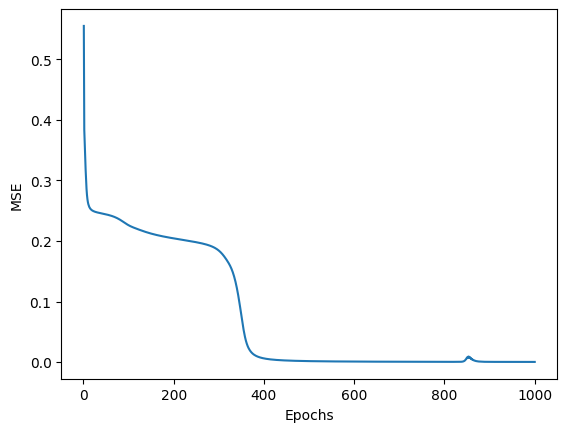

In [19]:
# define the network
network = NeuralNetwork(layers=[
    layers.Dense(2, 3),
    activations.Tanh(),
    layers.Dense(3, 1),
    activations.Tanh(),
])

# train the model
network.fit(
    X_train=np.reshape(X, (4, 2, 1)),
    y_train=np.reshape(y, (4, 1, 1)),
    epochs=1000,
    learning_rate=0.1,
    verbose=False
)

# plot error
error_df = network.error_df

fig, ax = plt.subplots()
ax.plot(error_df['epoch'], error_df['error'])
ax.set(xlabel='Epochs', ylabel='MSE')

plt.show()

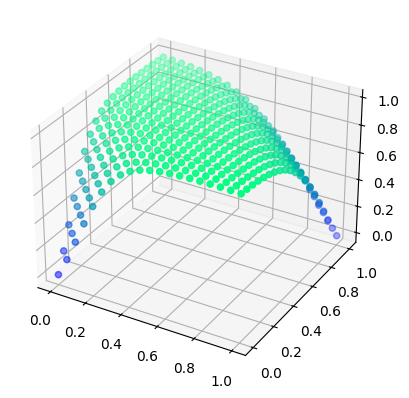

In [21]:
# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = network.predict([[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()